In [38]:
from textblob import TextBlob
import csv
import re
import operator
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
#######################
import string
import random

from deap import base, creator, tools
###############################
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
##############################


In [39]:
tweets = []
def strip_non_ascii(string):
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)

with open('input.csv','rt')as f:
  data = csv.reader(f)
  for row in data:
        #print(row)
        tweet= dict()
        tweet['text'] = row[0]
        tweet['row_number'] = int(row[1])
        tweet['pubdate'] = int(row[2])

        # Ignore retweets
        if re.match(r'^RT.*', tweet['text']):
            continue

        tweet['clean'] = tweet['text']

        # Remove all non-ascii characters
        tweet['clean'] = strip_non_ascii(tweet['clean'])

        # Normalize case
        tweet['clean'] = tweet['clean'].lower()

        # Remove URLS. (I stole this regex from the internet.)
        tweet['clean'] = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet['clean'])
        # Fix classic tweet lingo
        tweet['clean'] = re.sub(r'\bthats\b', 'that is', tweet['clean'])
        tweet['clean'] = re.sub(r'\bive\b', 'i have', tweet['clean'])
        tweet['clean'] = re.sub(r'\bim\b', 'i am', tweet['clean'])
        tweet['clean'] = re.sub(r'\bya\b', 'yeah', tweet['clean'])
        tweet['clean'] = re.sub(r'\bcant\b', 'can not', tweet['clean'])
        tweet['clean'] = re.sub(r'\bwont\b', 'will not', tweet['clean'])
        tweet['clean'] = re.sub(r'\bid\b', 'i would', tweet['clean'])
        tweet['clean'] = re.sub(r'wtf', 'what the fuck', tweet['clean'])
        tweet['clean'] = re.sub(r'\bwth\b', 'what the hell', tweet['clean'])
        tweet['clean'] = re.sub(r'\br\b', 'are', tweet['clean'])
        tweet['clean'] = re.sub(r'\bu\b', 'you', tweet['clean'])
        tweet['clean'] = re.sub(r'\bk\b', 'OK', tweet['clean'])
        tweet['clean'] = re.sub(r'\bsux\b', 'sucks', tweet['clean'])
        tweet['clean'] = re.sub(r'\bno+\b', 'no', tweet['clean'])
        tweet['clean'] = re.sub(r'\bcoo+\b', 'cool', tweet['clean'])
        tweet['TextBlob'] = TextBlob(tweet['clean'])
###########################################################
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMax)
        toolbox = base.Toolbox()
# Gene Pool
        toolbox.register("attr_string", random.choice, \
               string.ascii_letters + string.digits )
        #Number of characters in word
# The word to be guessed
        word = list(tweet['TextBlob'])
        N = len(word)
# Initialize population
        toolbox.register("individual", tools.initRepeat, \
         creator.Individual, toolbox.attr_string, N )
        toolbox.register("population",tools.initRepeat, list,\
         toolbox.individual)
        def evalWord(individual, word):
            return sum(individual[i] == word[i] for i in\
            range(len(individual))),
        toolbox.register("evaluate", evalWord, word)
        toolbox.register("mate", tools.cxTwoPoint)
        toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
        toolbox.register("select", tools.selTournament, tournsize=3)
        random.seed(64)
        pop = toolbox.population(n=100)
# CXPB is the crossover probability 
# MUTPB is the probability for mutating an individual
        CXPB, MUTPB = 0.5, 0.2
        #print("Start of evolution")
# Evaluate the entire population
        fitnesses = list(map(toolbox.evaluate, pop))
        for ind, fit in zip(pop, fitnesses):
            ind.fitness.values = fit

            #print(" Evaluated %i individuals" % len(pop))

# Extracting all the fitnesses of individuals in a list
            #fits = [ind.fitness.values[0] for ind in pop]
# Variable keeping track of the number of generations
        g = 0
        kk=1;

# Begin the evolution
        while kk<=10:#max(100):
            g += 1
            kk+=1
       # print("-- Generation %i --" % g)

# Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
# Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

# Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
# cross two individuals with probability CXPB
            if random.random():
                toolbox.mate(child1, child2)
# fitness values of the children
# must be recalculated later
        del child1.fitness.values
        del child2.fitness.values
        for mutant in offspring:
# mutate an individual with probability MUTPB
            if random.random():
                toolbox.mutate(mutant)
                del mutant.fitness.values

# Evaluate the individuals with an invalid fitness
                invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
                fitnesses = map(toolbox.evaluate, invalid_ind)
                for ind, fit in zip(invalid_ind, fitnesses):
                    ind.fitness.values = fit

                    #print(" Evaluated %i individuals" % len(invalid_ind))

# The population is entirely replaced by the offspring
                    pop[:] = offspring

# Gather all the fitnesses in one list and print the stats
                    fits = 10#[ind.fitness.values[0] for ind in pop]

                    length = len(pop)
                    mean = 10/100#sum(fits) / length
                    sum2 = 10/100*10#sum(x*x for x in fits)
                    std = abs(sum2 / 100 - mean**2)**0.5

                    #print(" Min %s" % min(fits))
                    #print(" Max %s" % max(fits))
                   # print(" Avg %s" % mean)
                    #print(" Std %s" % std)
                    #print("-- End of (successful) evolution --")
                    best_ind = tools.selBest(pop, 1)[0]
                    #print("Best individual is %s, %s" % (''.join(best_ind),\best_ind.fitness.values))
                    #################################################################
                    
                tweets.append(tweet)
############################################


In [40]:
##################################################
for tweet in tweets:
    tweet['polarity'] = float(tweet['TextBlob'].sentiment.polarity)
    tweet['subjectivity'] = float(tweet['TextBlob'].sentiment.subjectivity)

    if tweet['polarity'] >= 0.1:
        tweet['sentiment'] = 'positive'
    elif tweet['polarity'] <= -0.1:
        tweet['sentiment'] = 'negative'
    else:
        tweet['sentiment'] = 'neutral'

tweets_sorted = sorted(tweets, key=lambda k: k['polarity'])

In [41]:
print("\n\nTOP NEGATIVE TWEETS")
negative_tweets = [d for d in tweets_sorted if d['sentiment'] == 'negative']
for tweet in negative_tweets[0:100]:
    print("id=%d, polarity=%.2f, clean=%s" % (tweet['row_number'], tweet['polarity'], tweet['clean']))

print("\n\nTOP POSITIVE TWEETS")
positive_tweets = [d for d in tweets_sorted if d['sentiment'] == 'positive']
for tweet in positive_tweets[-100:]:
    print("id=%d, polarity=%.2f, clean=%s" % (tweet['row_number'], tweet['polarity'], tweet['clean']))

print("\n\nTOP NEUTRAL TWEETS")
neutral_tweets = [d for d in tweets_sorted if d['sentiment'] == 'neutral']
for tweet in neutral_tweets[0:500]:
    print("id=%d, polarity=%.2f, clean=%s" % (tweet['row_number'], tweet['polarity'], tweet['clean']))



TOP NEGATIVE TWEETS
id=2659641531, polarity=-1.00, clean=.one of the worst things i ever said was ?yeah i bet you?re just dying to get out of the hospital? i?m a dumbass.
id=2659641531, polarity=-1.00, clean=.one of the worst things i ever said was ?yeah i bet you?re just dying to get out of the hospital? i?m a dumbass.
id=2659641531, polarity=-1.00, clean=.one of the worst things i ever said was ?yeah i bet you?re just dying to get out of the hospital? i?m a dumbass.
id=2659641531, polarity=-1.00, clean=.one of the worst things i ever said was ?yeah i bet you?re just dying to get out of the hospital? i?m a dumbass.
id=2659641531, polarity=-1.00, clean=.one of the worst things i ever said was ?yeah i bet you?re just dying to get out of the hospital? i?m a dumbass.
id=2659641531, polarity=-1.00, clean=.one of the worst things i ever said was ?yeah i bet you?re just dying to get out of the hospital? i?m a dumbass.
id=2659641531, polarity=-1.00, clean=.one of the worst things i ever sai

id=2603135146, polarity=0.00, clean=.am i the only one who thinks justin bieber is fugly af now?
id=2603135146, polarity=0.00, clean=.am i the only one who thinks justin bieber is fugly af now?
id=2603135146, polarity=0.00, clean=.am i the only one who thinks justin bieber is fugly af now?
id=2603135146, polarity=0.00, clean=.am i the only one who thinks justin bieber is fugly af now?
id=2603135146, polarity=0.00, clean=.am i the only one who thinks justin bieber is fugly af now?
id=2603135146, polarity=0.00, clean=.am i the only one who thinks justin bieber is fugly af now?
id=2603135146, polarity=0.00, clean=.am i the only one who thinks justin bieber is fugly af now?
id=2603135146, polarity=0.00, clean=.am i the only one who thinks justin bieber is fugly af now?
id=2603135146, polarity=0.00, clean=.am i the only one who thinks justin bieber is fugly af now?
id=2603135146, polarity=0.00, clean=.am i the only one who thinks justin bieber is fugly af now?
id=2603135146, polarity=0.00, 

C:\Users\anish\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


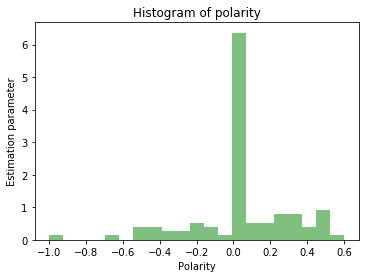

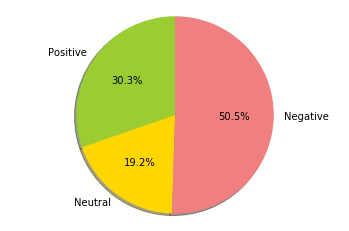

In [42]:
x = [d['polarity'] for d in tweets_sorted]
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Estimation parameter')
plt.title(r'Histogram of polarity')
plt.subplots_adjust(left=0.15)
plt.show()

pos = len(positive_tweets)
neu = len(negative_tweets)
neg = len(neutral_tweets)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neu, neg]
colors = ['yellowgreen', 'gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [43]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
articles = []
labels = []

with open("classified.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print('the nof labels in dataset',len(labels))
print('the nof reviews in dataset ',len(articles))

train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

the nof labels in dataset 2225
the nof reviews in dataset  2225


In [59]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = ' '


# Importing the dataset
#dataset1=pd.read_csv('classified.csv')
#train=dataset1.iloc[:1000,:]
dataset = pd.read_csv('IMDB Dataset.csv')
test1=dataset.iloc[:1000,:]



print('the test set1 shape',test1.shape)


the test set1 shape (1000, 2)


In [60]:
print('the test set1')
test1.head()

the test set1


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [61]:

validation_articles1=test1.iloc[:,0]
validation_labels1=test1.iloc[:,1]


In [62]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

print(train_padded[10])

validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

print(set(labels))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)



###############################################
def CapsNet(input_shape, n_class, routings):
   x = layers.Input(shape=input_shape)

   # Layer 1: Just a conventional Conv2D layer
   conv1 = layers.Conv2D(filters=256, kernel_size=9, strides=1, padding='valid', activation='relu', name='conv1')(x)

   # Layer 2: Conv2D layer with `squash` activation, then reshape to [None, num_capsule, dim_capsule]
   primarycaps = PrimaryCap(conv1, dim_capsule=8, n_channels=32, kernel_size=9, strides=2, padding='valid')

   # Layer 3: Capsule layer. Routing algorithm works here.
   digitcaps = CapsuleLayer(num_capsule=n_class, dim_capsule=16, routings=routings,
   name='digitcaps')(primarycaps)

   # Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
   # If using tensorflow, this will not be necessary. :)
   out_caps = Length(name='capsnet')(digitcaps)

   # Decoder network.
   y = layers.Input(shape=(n_class,))
   masked_by_y = Mask()([digitcaps, y]) # The true label is used to mask the output of capsule layer. For training
   masked = Mask()(digitcaps) # Mask using the capsule with maximal length. For prediction

   # Shared Decoder model in training and prediction
   decoder = models.Sequential(name='decoder')
   decoder.add(layers.Dense(512, activation='relu', input_dim=16*n_class))
   decoder.add(layers.Dense(1024, activation='relu'))
   decoder.add(layers.Dense(np.prod(input_shape), activation='sigmoid'))
   decoder.add(layers.Reshape(target_shape=input_shape, name='out_recon'))

   # Models for training and evaluation (prediction)
   train_model = models.Model([x, y], [out_caps, decoder(masked_by_y)])
   eval_model = models.Model(x, [out_caps, decoder(masked)])

   # manipulate model
   noise = layers.Input(shape=(n_class, 16))
   noised_digitcaps = layers.Add()([digitcaps, noise])
   masked_noised_y = Mask()([noised_digitcaps, y])
   manipulate_model = models.Model([x, y, noise], decoder(masked_noised_y))

   return train_model, eval_model, manipulate_model

[2431, 1, 225, 4994, 22, 641, 587, 225, 4994, 1, 1, 1663, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2307, 1, 1144, 1694, 1, 1722, 4995, 1, 1, 1, 1, 1, 4737, 1, 1, 122, 4513, 1, 2, 2874, 1506, 352, 4738, 1, 52, 341, 1, 352, 2172, 3961, 41, 22, 3795, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 4739, 1, 365, 22, 1, 787, 2367, 1, 4301, 138, 10, 1, 3665, 682, 3532, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4994, 1, 600, 1, 1694, 1021, 1, 4996, 807, 1865, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1607, 4997, 543, 493, 1, 1444, 4740, 778, 1320, 1, 1862, 10, 33, 641, 319, 1, 62, 479, 565, 301, 1507, 22, 480, 1, 1, 1666, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2971, 4734, 1, 1, 1, 1, 1, 850, 39, 1826, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4302, 247]
426
200
192
200
186
200
[2431    1  225 4994   22  641  587  225 4994    1    1 1663    1    1
 2431   22  565    1    1  140  278    1  140  278  796  822  662 2307

In [63]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


validation_sequences1 = tokenizer.texts_to_sequences(validation_articles1)
validation_padded1 = pad_sequences(validation_sequences1, maxlen=max_length, padding=padding_type, truncating=trunc_type)



label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq1 = np.array(label_tokenizer.texts_to_sequences(validation_labels1))


reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

print(set(labels))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded1, validation_label_seq1), verbose=2)



###############################################
def CapsNet(input_shape, n_class, routings):
   x = layers.Input(shape=input_shape)

   # Layer 1: Just a conventional Conv2D layer
   conv1 = layers.Conv2D(filters=256, kernel_size=9, strides=1, padding='valid', activation='relu', name='conv1')(x)

   # Layer 2: Conv2D layer with `squash` activation, then reshape to [None, num_capsule, dim_capsule]
   primarycaps = PrimaryCap(conv1, dim_capsule=8, n_channels=32, kernel_size=9, strides=2, padding='valid')

   # Layer 3: Capsule layer. Routing algorithm works here.
   digitcaps = CapsuleLayer(num_capsule=n_class, dim_capsule=16, routings=routings,
   name='digitcaps')(primarycaps)

   # Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
   # If using tensorflow, this will not be necessary. :)
   out_caps = Length(name='capsnet')(digitcaps)

   # Decoder network.
   y = layers.Input(shape=(n_class,))
   masked_by_y = Mask()([digitcaps, y]) # The true label is used to mask the output of capsule layer. For training
   masked = Mask()(digitcaps) # Mask using the capsule with maximal length. For prediction

   # Shared Decoder model in training and prediction
   decoder = models.Sequential(name='decoder')
   decoder.add(layers.Dense(512, activation='relu', input_dim=16*n_class))
   decoder.add(layers.Dense(1024, activation='relu'))
   decoder.add(layers.Dense(np.prod(input_shape), activation='sigmoid'))
   decoder.add(layers.Reshape(target_shape=input_shape, name='out_recon'))

   # Models for training and evaluation (prediction)
   train_model = models.Model([x, y], [out_caps, decoder(masked_by_y)])
   eval_model = models.Model(x, [out_caps, decoder(masked)])

   # manipulate model
   noise = layers.Input(shape=(n_class, 16))
   noised_digitcaps = layers.Add()([digitcaps, noise])
   masked_noised_y = Mask()([noised_digitcaps, y])
   manipulate_model = models.Model([x, y, noise], decoder(masked_noised_y))

   return train_model, eval_model, manipulate_model

[2431, 1, 225, 4994, 22, 641, 587, 225, 4994, 1, 1, 1663, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2307, 1, 1144, 1694, 1, 1722, 4995, 1, 1, 1, 1, 1, 4737, 1, 1, 122, 4513, 1, 2, 2874, 1506, 352, 4738, 1, 52, 341, 1, 352, 2172, 3961, 41, 22, 3795, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 4739, 1, 365, 22, 1, 787, 2367, 1, 4301, 138, 10, 1, 3665, 682, 3532, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4994, 1, 600, 1, 1694, 1021, 1, 4996, 807, 1865, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1607, 4997, 543, 493, 1, 1444, 4740, 778, 1320, 1, 1862, 10, 33, 641, 319, 1, 62, 479, 565, 301, 1507, 22, 480, 1, 1, 1666, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2971, 4734, 1, 1, 1, 1, 1, 850, 39, 1826, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4302, 247]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3